# **Without Dividend**

In [25]:
import yfinance as yf
import pandas as pd

In [26]:
ticker=yf.Ticker('SPY')

In [27]:
current_price=ticker.history(period='1d').Close.values[0]

In [28]:
current_date=pd.Timestamp.now()
maturity_date=current_date+pd.DateOffset(days=7)
maturity_date

Timestamp('2025-06-17 14:17:50.094731')

In [29]:
opt_chain = ticker.option_chain(maturity_date.strftime("%Y-%m-%d"))
calls = opt_chain.calls
puts = opt_chain.puts

In [30]:
end_date=pd.Timestamp.now()
start_date=end_date-pd.DateOffset(years=2)
df=yf.download('SPY',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [31]:
spy=df['Close']
spy.head(2)

Ticker,SPY
Date,
2023-06-12,422.233765
2023-06-13,425.017517


In [32]:
vol = df['Close'].pct_change().std()
vol=vol[-1]

<ipython-input-32-2e26a25f0062>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vol=vol[-1]


In [33]:
import numpy as np
import math
annual_vol=vol*np.sqrt(252)
annual_vol

np.float64(0.16506692070826784)

In [34]:
!pip install fredapi

In [35]:
from fredapi import Fred
fred = Fred(api_key='0f20831928a8c94e2df17df8fdefe2e6')
latest_rate=((fred.get_series('TB3MS'))[-1])/100
latest_rate

<ipython-input-35-f8554fc235bc>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_rate=((fred.get_series('TB3MS'))[-1])/100


np.float64(0.0425)

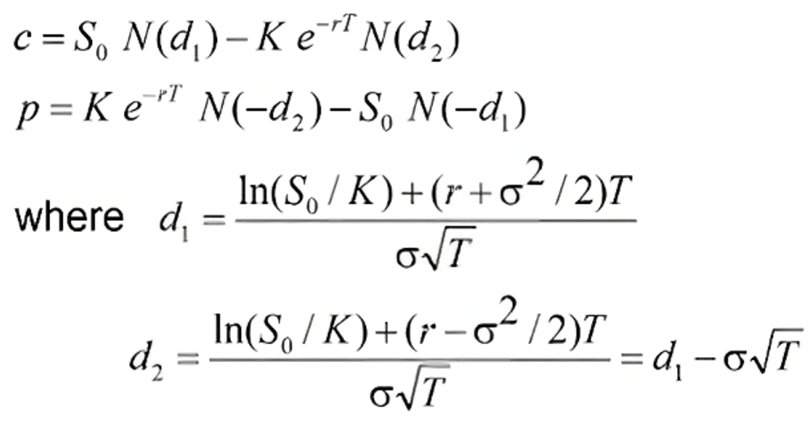

## **Call Option**

In [36]:
strike_price=int(current_price)+1
option_det=calls[calls['strike']==strike_price]
option_det

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
38,SPY250617C00602000,2025-06-10 13:43:39+00:00,602.0,3.94,3.91,3.95,0.23,6.199461,15.0,421,0.124032,False,REGULAR,USD


In [37]:
actual_price= option_det['lastPrice'].values[0]

In [38]:
#Required Data
S = current_price
K = strike_price
r = latest_rate
sigma = annual_vol
print(sigma)
T=(float)(6/252)

0.16506692070826784


In [39]:
d1=(np.log(S/K) + (r+(sigma**2)/2)*T) / (sigma*np.sqrt(T))
d1

np.float64(-0.009216122931112793)

In [40]:
d2=d1-(sigma*np.sqrt(T))
d2

np.float64(-0.03468650176432552)

In [41]:
from scipy.stats import norm

In [42]:
model_price = S*norm.cdf(d1) - K*(np.exp(-r*T))*norm.cdf(d2)
model_price

np.float64(5.942386638491087)

## **Conclusion**

So Modeled Option's Price = $6.24

Whereas the actual price = $4.61

As (Actual < Modeled) an asset is underprices(good for the buyer)

And The value of price is same unlike the binomial model where the modeled price got more and more finer as N increased.

## **Put Option**

In [43]:
strike_price=int(current_price)+1
option_det=puts[puts['strike']==strike_price]
option_det

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
74,SPY250617P00602000,2025-06-10 13:43:49+00:00,602.0,5.07,5.03,5.06,-0.6,-10.582009,26.0,166,0.128732,True,REGULAR,USD


In [44]:
#Required Data
S = current_price
K = strike_price
r = latest_rate
sigma = annual_vol
print(sigma)
T=(float)(6/252)

0.16506692070826784


In [45]:
d1=(np.log(S/K) + (r+(sigma**2)/2)*T) / (sigma*np.sqrt(T))
d1

np.float64(-0.009216122931112793)

In [46]:
d2=d1-(sigma*np.sqrt(T))
d2

np.float64(-0.03468650176432552)

In [47]:
model_price = K*(np.exp(-r*T))*norm.cdf(-d2) - S*norm.cdf(-d1)
model_price

np.float64(6.278535401435306)

## ***Conclusion***

So Modeled Option's Price = $5.95

Whereas the actual price = $4.71

As (Actual < Modeled) an asset is underprices(good for the buyer)

And The value of price is same unlike the binomial model where the modeled price got more and more finer as N increased.